# **Applied Machine Learning Coursework**

**Importing some of the required libraries**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import warnings
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

**Loading the dataset Option 1: Predicting the severity of road accidents in the UK**

In [4]:
from google.colab import files
uploaded = files.upload()

RoadAccidentDataset = pd.read_csv('dataset_Option1.csv')


Saving dataset_Option1.csv to dataset_Option1.csv


# **DATA PRE PROCESSING**

# **Data Quality Assessment and Exploratory Data Analysis**

**Finding the Shape of the Dataset**

In [138]:
print("The shape of the dataset:",RoadAccidentDataset.shape)

The shape of the dataset: (31647, 14)


**It can be seen, that the shape of the dataset is (31647,14). This means that there are 31657 rows and 14 columns.**

**Finding the 14 Columns of the Dataset**

In [139]:
print("Columns of the dataset:",RoadAccidentDataset.columns)

Columns of the dataset: Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


**Finding the Data Types of the 14 columns.**

In [140]:
print("The data types of all the columns:\n\n", RoadAccidentDataset.dtypes)

The data types of all the columns:

 accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


**From the above results, it can be seen that there are only two columns with a numeric data type which is "speed_limit" and "age_of_oldest_driver". Below I have visualized the results.**

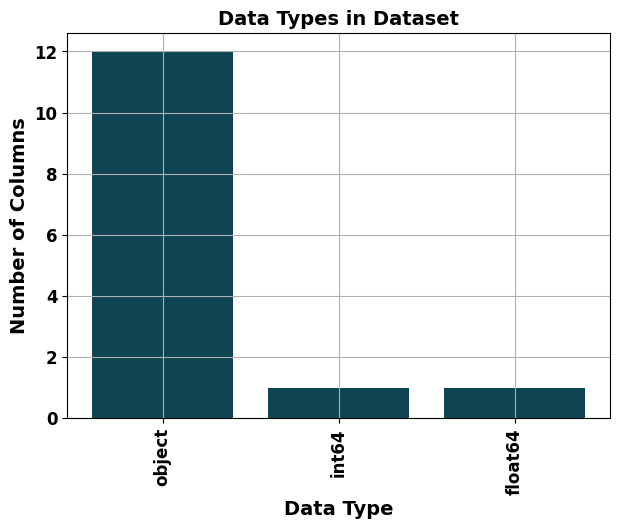

In [141]:


# Get the data types of the columns
data_types = RoadAccidentDataset.dtypes.value_counts()

# Plot the bar chart
plt.figure(figsize=(7,5))
plt.bar(data_types.index.astype(str), data_types.values, color='#0f4452')
plt.title('Data Types in Dataset', fontsize=14, weight='bold')
plt.xlabel('Data Type', fontsize=14, weight='bold')
plt.ylabel('Number of Columns', fontsize=14, weight='bold')
plt.xticks(fontsize=12, weight='bold', rotation=90)
plt.yticks(fontsize=12, weight='bold')
# Add gridlines
plt.grid(True)

plt.show()


**Finding a Statistical Summary of the two numerical columns: "speed_limit" and "age_of_oldest_driver"**

In [142]:
display("Statistical Summary",RoadAccidentDataset.describe()) 

'Statistical Summary'

speed_limit  age_of_oldest_driver
count  31647.000000          25197.000000
mean      36.572029             47.254038
std       13.837362             16.779656
min       -1.000000              6.000000
25%       30.000000             34.000000
50%       30.000000             47.000000
75%       40.000000             59.000000
max       70.000000            101.000000

**The above results shows the statistical summary of the two columns with a integer and float data type. As all the other columns do not have numeric values, they are not summarized as mean, median, min and max.**

**From the statistical summary of the two numerical columns, it can viewed that the minimum value for the column "speed_limit" is -1 which is an invalid speed limit as the speed can never be a negative value. Hence here an invalid number is identified. Below I have shown a box plot, which displays the values of the column "speed_limit".**

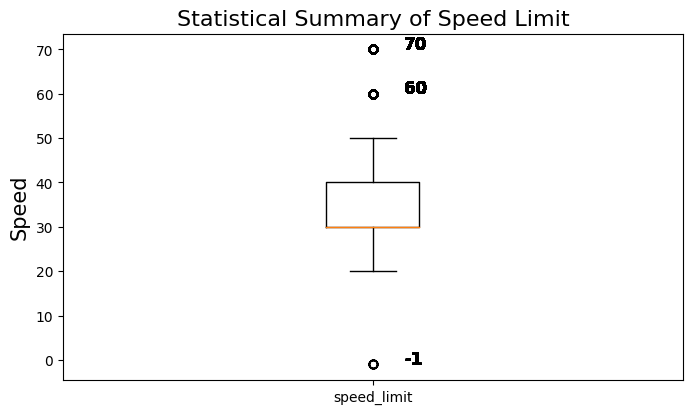

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

selected = ['speed_limit']

plt.figure(figsize=(8, 4.5))
boxplot = plt.boxplot(RoadAccidentDataset[selected], labels=selected)
outlier_values = boxplot['fliers'][0].get_ydata()
for value in outlier_values:
    plt.text(1.05, value, value, fontsize=12, weight='bold', color='black')
plt.ylabel('Speed', fontsize=15)
plt.title('Statistical Summary of Speed Limit', fontsize=16)

plt.show()


**Viewing the Dataset**

In [144]:
display("The first 5 rows:",RoadAccidentDataset.head(5))

'The first 5 rows:'

accident_index  speed_limit light_conditions weather_conditions  \
0       2.02E+12           30         darkness              other   
1       2.02E+12           30         darkness               fine   
2       2.02E+12           40         daylight               fine   
3       2.02E+12           40         daylight               fine   
4       2.02E+12           30         daylight               fine   

  road_surface_conditions      vehicle_type  \
0             wet or damp  at least one van   
1                     dry         only cars   
2                     dry         only cars   
3                     dry         only cars   
4                     dry         only cars   

                        junction_location    skidding_and_overturning  \
0      at or within 20 metres of junction  no skidding or overturning   
1      at or within 20 metres of junction  no skidding or overturning   
2      at or within 20 metres of junction  no skidding or overturning   
3  not at or within 20 metres of junction  no skidding or overturning   
4  not at or within 20 metres of junction  no skidding or overturning   

                vehicle_leaving_carriageway  \
0                  none leaving carriageway   
1  at least one vehicle leaving carriageway   
2                  none leaving carriageway   
3                  none leaving carriageway   
4                  none leaving carriageway   

           hit_object_off_carriageway  \
0                  none hit an object   
1  at least one vehicle hit an object   
2                  none hit an object   
3                  none hit an object   
4                  none hit an object   

                      first_point_of_impact                 sex_of_driver  \
0                    other points of impact                     all males   
1  at least one vehicle with frontal impact                     all males   
2  at least one vehicle with frontal impact  data missing or out of range   
3  at least one vehicle with frontal impact               male and female   
4  at least one vehicle with frontal impact                   all females   

   age_of_oldest_driver accident_severity  
0                  63.0           serious  
1                  82.0             fatal  
2                   NaN           serious  
3                   NaN           serious  
4                  39.0            slight

**From the first 5 rows of the dataset, it can be seen that the column "age_of_oldest_driver has some "NaN" values. Also, the columns "sex_of_driver" has missing values.**

In [145]:
display("10 Random rows of the dataset",RoadAccidentDataset.sample(10))

'10 Random rows of the dataset'

accident_index  speed_limit light_conditions  \
8523        2.02E+12           20         daylight   
6938        2.02E+12           60         daylight   
2005        2.02E+12           30         daylight   
11727       2.02E+12           20         darkness   
3109        2.02E+12           20         darkness   
11858  201906xe52023           70         darkness   
23810       2.02E+12           30         daylight   
12374       2.02E+12           20         daylight   
26394       2.02E+12           30         daylight   
11639       2.02E+12           40         daylight   

                 weather_conditions road_surface_conditions  \
8523   data missing or out of range                     dry   
6938                    fog or mist             wet or damp   
2005                           fine                     dry   
11727                          fine                     dry   
3109                          other             wet or damp   
11858                          fine                     dry   
23810                          fine                     dry   
12374                          fine                     dry   
26394                         other             wet or damp   
11639                          fine             wet or damp   

             vehicle_type                       junction_location  \
8523            only cars      at or within 20 metres of junction   
6938            only cars      at or within 20 metres of junction   
2005     at least one van      at or within 20 metres of junction   
11727           only cars  not at or within 20 metres of junction   
3109   at least one biped            data missing or out of range   
11858           only cars  not at or within 20 metres of junction   
23810           only cars  not at or within 20 metres of junction   
12374  at least one biped      at or within 20 metres of junction   
26394           only cars  not at or within 20 metres of junction   
11639           only cars  not at or within 20 metres of junction   

                         skidding_and_overturning  \
8523                   no skidding or overturning   
6938   at least one vehicle skidded or overturned   
2005                   no skidding or overturning   
11727                data missing or out of range   
3109                 data missing or out of range   
11858                  no skidding or overturning   
23810  at least one vehicle skidded or overturned   
12374                  no skidding or overturning   
26394                  no skidding or overturning   
11639                  no skidding or overturning   

                    vehicle_leaving_carriageway  \
8523                   none leaving carriageway   
6938   at least one vehicle leaving carriageway   
2005                   none leaving carriageway   
11727              data missing or out of range   
3109               data missing or out of range   
11858  at least one vehicle leaving carriageway   
23810  at least one vehicle leaving carriageway   
12374                  none leaving carriageway   
26394                  none leaving carriageway   
11639                  none leaving carriageway   

               hit_object_off_carriageway  \
8523                   none hit an object   
6938   at least one vehicle hit an object   
2005                   none hit an object   
11727        data missing or out of range   
3109         data missing or out of range   
11858                  none hit an object   
23810                  none hit an object   
12374                  none hit an object   
26394                  none hit an object   
11639                  none hit an object   

                          first_point_of_impact                 sex_of_driver  \
8523   at least one vehicle with frontal impact  data missing or out of range   
6938   at least one vehicle with frontal impact                   all females   
2005   at least one vehicle with frontal impact                     all 

**Identifying and Filling in Missing Data**

**It has been identified above, that there is invalid data and some missing values in the columns of the dataset. Next, I am finding the count of the NaN values in the columns**

In [146]:
RoadAccidentDataset.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

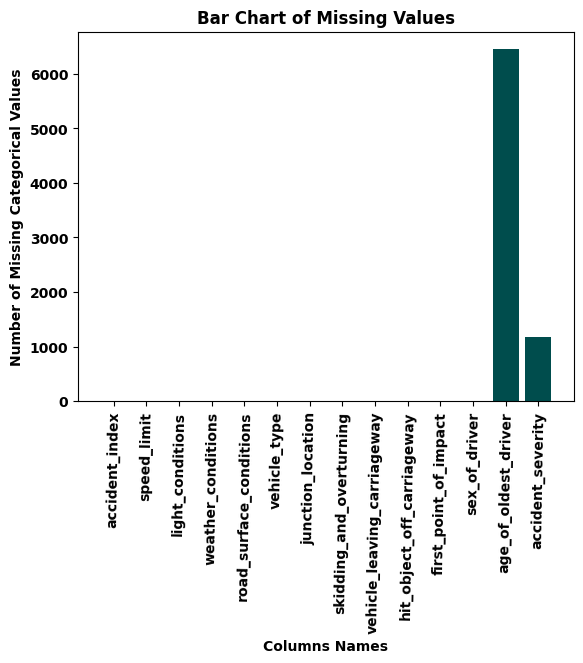

In [9]:
import matplotlib.pyplot as plt

missing_values = RoadAccidentDataset.isna().sum()
plt.bar(missing_values.index, missing_values.values, color ='#004d4d')
plt.yticks(fontweight='bold')
plt.xticks(rotation=89,fontweight='bold')
plt.xlabel('Columns Names',fontweight='bold')
plt.ylabel('Number of Missing Categorical Values',fontweight='bold')
plt.title('Bar Chart of Missing Values',fontweight='bold')
plt.show()


**It can be seen above that only "age_of_oldest_driver" and "accident_severity* have NaN values.Next, I have found the ratio of missing values in these two columns.Each column's ratio of missing values, which ranges from 0 to 1, indicates the percentage of missing data in that column.**

In [148]:
missing_ratio = RoadAccidentDataset.isna().mean()
print(missing_ratio)

accident_index                 0.000000
speed_limit                    0.000000
light_conditions               0.000000
weather_conditions             0.000000
road_surface_conditions        0.000000
vehicle_type                   0.000000
junction_location              0.000000
skidding_and_overturning       0.000000
vehicle_leaving_carriageway    0.000000
hit_object_off_carriageway     0.000000
first_point_of_impact          0.000000
sex_of_driver                  0.000000
age_of_oldest_driver           0.203811
accident_severity              0.037034
dtype: float64


**The "age_of_oldest_driver" column's missing ratio is 20.38%. It indicates that 20.38% of the data in this column are NaN values. Similarly, the missing ratio for "accident_severity" is 3.7% which means that 3.7% of the data in this column are NaN values.**

**It is  found that the column "age_of_oldest_driver" has 6450 NaN values. In the next step, I have removed the NaN values through Imputation. For imputation strategy I have used median which means all the missing values will be replaced by the median values of the column.**


In [10]:

train_dataset_no_nans =  RoadAccidentDataset.copy()

# Imputer with strategy median
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'median')  
numerical_columns = ['age_of_oldest_driver']
imptr_num = imptr_num.fit(train_dataset_no_nans[numerical_columns]) 

train_dataset_no_nans[numerical_columns] = \
imptr_num.transform(train_dataset_no_nans[numerical_columns]) 


train_dataset_no_nans[numerical_columns]



age_of_oldest_driver
0                      63.0
1                      82.0
2                      47.0
3                      47.0
4                      39.0
...                     ...
31642                  27.0
31643                  27.0
31644                  67.0
31645                  24.0
31646                  54.0

[31647 rows x 1 columns]

**Above, the result after imputation with Median can be seen.**

In [11]:
train_dataset_no_nans.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver              0
accident_severity              1172
dtype: int64

**Previously it was identified that there were 6450 NaN values in the "age_of_oldest_driver" column. But now it can be seen that there are 0 NaN values. This shows that the imputation is successfully implemented.**

**It is also identified earlier that the column "speed_limit" has value less than 0 which is invalid. Below, I am showing the lowest value of this column again.**

In [151]:
print("The lowest value of speed limit:",train_dataset_no_nans["speed_limit"].min())

The lowest value of speed limit: -1


**In the next step, I have only selected the values which are greater than 0 and removed the rows that are less than 0.**

In [12]:

train_dataset_no_nans=train_dataset_no_nans[train_dataset_no_nans["speed_limit"] > 0 ]#SPEED LIMIT GREATER THAN 0

In [13]:
train_dataset_no_nans["speed_limit"].describe()

count    31622.000000
mean        36.601733
std         13.802428
min         20.000000
25%         30.000000
50%         30.000000
75%         40.000000
max         70.000000
Name: speed_limit, dtype: float64

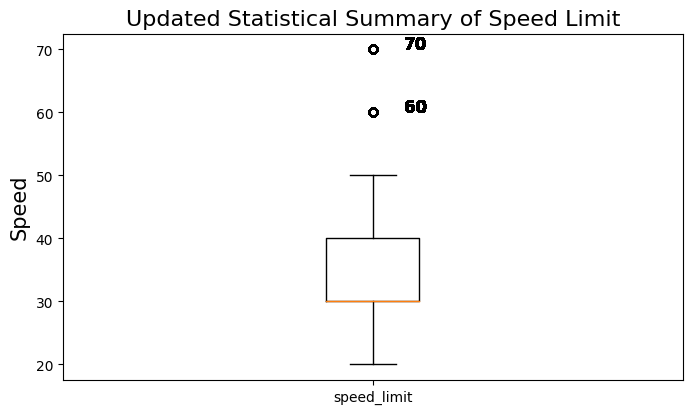

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

selected = ['speed_limit']

plt.figure(figsize=(8, 4.5))
boxplot = plt.boxplot(train_dataset_no_nans[selected], labels=selected)
outlier_values = boxplot['fliers'][0].get_ydata()
for value in outlier_values:
    plt.text(1.05, value, value, fontsize=12, weight='bold', color='black')
plt.ylabel('Speed', fontsize=15)
plt.title('Updated Statistical Summary of Speed Limit', fontsize=16)

plt.show()


**It can now be seen that the minimum speed limit of -1 has been removed, and  only the values that are above the speed limit of 0 exists.**


**Next, I am selecting all the categorical columns and finding the row count for each categorical column in the dataset.**

In [15]:

categorical_columns= ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type','junction_location', 'skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver','accident_severity']


for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(RoadAccidentDataset[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'



Categories and number of occurrences for 'weather_conditions'



Categories and number of occurrences for 'road_surface_conditions'



Categories and number of occurrences for 'vehicle_type'



Categories and number of occurrences for 'junction_location'



Categories and number of occurrences for 'skidding_and_overturning'



Categories and number of occurrences for 'vehicle_leaving_carriageway'



Categories and number of occurrences for 'hit_object_off_carriageway'



Categories and number of occurrences for 'first_point_of_impact'



Categories and number of occurrences for 'sex_of_driver'



Categories and number of occurrences for 'accident_severity'


**From the above results, it can be seen that the columns 'weather_conditions', 'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 'vehicle_leaving_carriageway','hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver' has data missing or out of range. In addition, it can viewed that the column 'accident_severity' has duplicate values.**

**First, I will remove the duplicate values in the column 'accident_severity'.**

In [16]:

train_dataset_no_nans.loc[train_dataset_no_nans.accident_severity=='Slight','accident_severity'] = 'slight' #replace Slight with slight

In [17]:

train_dataset_no_nans.loc[train_dataset_no_nans.accident_severity=='Fatal','accident_severity'] = 'fatal'#replace Fatal with fatal

In [18]:

train_dataset_no_nans.loc[train_dataset_no_nans.accident_severity=='Serious','accident_severity'] = 'serious'#replace Serious with serious

In [19]:

categorical_columns_accident= ['accident_severity']



for col in categorical_columns_accident:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(train_dataset_no_nans[col].value_counts())
  print()

Categories and number of occurrences for 'accident_severity'


**From the results above, it can be seen that the duplicates in the column 'accident_severity' is removed.**

**In the next step, I have replaced all the missing values  of the categorical columns with NaN.**

In [20]:
# replace with NaN
accepted_weather_conditions = ['fine','other','fog or mist']
accepted_road_surface_conditions = ['dry','wet or damp','other','flood over 3cm. deep']
accepted_vehicle_type = ['only cars','at least one biped','at least one van','biped and van','other']
accepted_junction_location = ['at or within 20 metres of junction','not at or within 20 metres of junction']
accepted_skidding_and_overturning = ['no skidding or overturning','at least one vehicle skidded or overturned']
accepted_vehicle_leaving_carriageway = ['none leaving carriageway','at least one vehicle leaving carriageway']
accepted_hit_object_off_carriageway = ['none hit an object','at least one vehicle hit an object']
accepted_first_point_of_impact = ['at least one vehicle with frontal impact','other points of impact','no impact']
accepted_sex_of_driver = ['all males','male and female','all females']


train_dataset_no_nans.loc[train_dataset_no_nans.weather_conditions.map(lambda x: x not in accepted_weather_conditions),'weather_conditions'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.road_surface_conditions.map(lambda x: x not in accepted_road_surface_conditions),'road_surface_conditions'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.vehicle_type.map(lambda x: x not in accepted_vehicle_type),'vehicle_type'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.junction_location.map(lambda x: x not in accepted_junction_location),'junction_location'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.skidding_and_overturning.map(lambda x: x not in accepted_skidding_and_overturning),'skidding_and_overturning'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.vehicle_leaving_carriageway.map(lambda x: x not in accepted_vehicle_leaving_carriageway),'vehicle_leaving_carriageway'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.hit_object_off_carriageway.map(lambda x: x not in accepted_hit_object_off_carriageway),'hit_object_off_carriageway'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.first_point_of_impact.map(lambda x: x not in accepted_first_point_of_impact),'first_point_of_impact'] = np.nan
train_dataset_no_nans.loc[train_dataset_no_nans.sex_of_driver.map(lambda x: x not in accepted_sex_of_driver),'sex_of_driver'] = np.nan

In [21]:
train_dataset_no_nans.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions              969
road_surface_conditions         364
vehicle_type                     63
junction_location              1463
skidding_and_overturning       2022
vehicle_leaving_carriageway    1958
hit_object_off_carriageway     1854
first_point_of_impact          1299
sex_of_driver                  5108
age_of_oldest_driver              0
accident_severity              1171
dtype: int64

**Here, it can be seen that all the missing values have been converted to NaN.**

**Visualizing the number of Missing Values with Bar Chart**

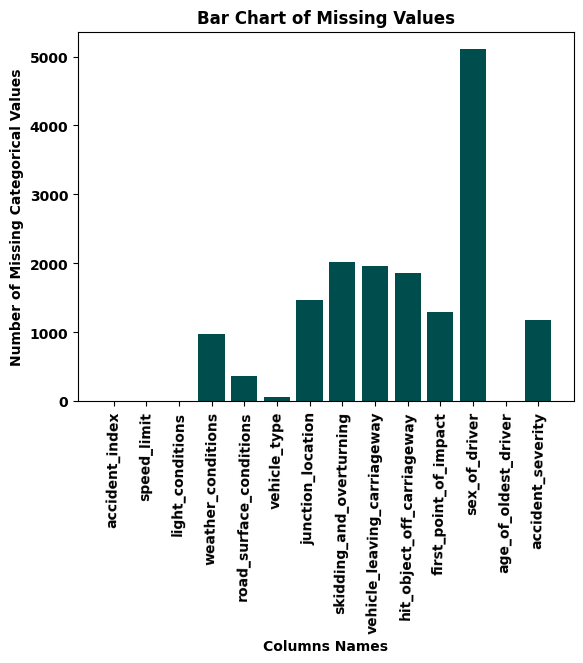

In [22]:
import matplotlib.pyplot as plt

missing_values = train_dataset_no_nans.isna().sum()
plt.bar(missing_values.index, missing_values.values, color ='#004d4d')
plt.yticks(fontweight='bold')
plt.xticks(rotation=89,fontweight='bold')
plt.xlabel('Columns Names',fontweight='bold')
plt.ylabel('Number of Missing Categorical Values',fontweight='bold')
plt.title('Bar Chart of Missing Values',fontweight='bold')
plt.show()


**In the above bar chart, it can be seen that the column "age_of_oldest_driver* has 0 NaN values, as it has been imputed previously with median values. It can seen that the column *sex_of_driver" has the highest NaN values of above 5000. All the other columns have NaN values less than 2500.**

**Next, I have replaced all the converted NaN values with the most frequest values through Imputation. For imputation strategy I have used the most frequent, which means the missing values will be replaced by the most frequest values of the columns.**

In [23]:
from sklearn.impute import SimpleImputer 


categorical_columns= ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact'
       , 'sex_of_driver','accident_severity']

# Imputer with strategy most frequent
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

imptr_cat = imptr_cat.fit(train_dataset_no_nans[categorical_columns])

train_dataset_no_nans[categorical_columns] = imptr_cat.transform(train_dataset_no_nans[categorical_columns])  


In [24]:
train_dataset_no_nans.isna().sum()

accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

**Here, it can be seen that all the NaN values are converted after imputation and 0 NaN values exists in the dataset.**

# **Label Encoding**

**Next, I have label encoded the dataset, and coverted the categorical values into numerical values. Below, the label encoded table can be seen.**

In [25]:
temp_dataset = train_dataset_no_nans.copy() 
lblEncoder_X = LabelEncoder()   
temp_dataset['light_conditions'] = lblEncoder_X.fit_transform(temp_dataset['light_conditions']) 
temp_dataset['weather_conditions'] = lblEncoder_X.fit_transform(temp_dataset['weather_conditions'])
temp_dataset['road_surface_conditions'] = lblEncoder_X.fit_transform(temp_dataset['road_surface_conditions'])
temp_dataset['vehicle_type'] = lblEncoder_X.fit_transform(temp_dataset['vehicle_type'])
temp_dataset['junction_location'] = lblEncoder_X.fit_transform(temp_dataset['junction_location'])
temp_dataset['skidding_and_overturning'] = lblEncoder_X.fit_transform(temp_dataset['skidding_and_overturning'])
temp_dataset['vehicle_leaving_carriageway'] = lblEncoder_X.fit_transform(temp_dataset['vehicle_leaving_carriageway'])
temp_dataset['hit_object_off_carriageway'] = lblEncoder_X.fit_transform(temp_dataset['hit_object_off_carriageway'])
temp_dataset['first_point_of_impact'] = lblEncoder_X.fit_transform(temp_dataset['first_point_of_impact'])
temp_dataset['sex_of_driver'] = lblEncoder_X.fit_transform(temp_dataset['sex_of_driver'])
temp_dataset['accident_severity'] = lblEncoder_X.fit_transform(temp_dataset['accident_severity'])
display(temp_dataset)

accident_index  speed_limit  light_conditions  weather_conditions  \
0           2.02E+12           30                 0                   2   
1           2.02E+12           30                 0                   0   
2           2.02E+12           40                 1                   0   
3           2.02E+12           40                 1                   0   
4           2.02E+12           30                 1                   0   
...              ...          ...               ...                 ...   
31642       2.02E+12           30                 0                   0   
31643       2.02E+12           60                 1                   0   
31644  20191369p0654           70                 1                   0   
31645       2.02E+12           30                 0                   0   
31646       2.02E+12           20                 0                   0   

       road_surface_conditions  vehicle_type  junction_location  \
0                            3             1                  0   
1                            0             3                  0   
2                            0             3                  0   
3                            0             3                  1   
4                            0             3                  1   
...                        ...           ...                ...   
31642                        3             0                  1   
31643                        0             4                  0   
31644                        0             1                  1   
31645                        3             3                  1   
31646                        0             0                  0   

       skidding_and_overturning  vehicle_leaving_carriageway  \
0                             1                            1   
1                             1                            0   
2                             1                            1   
3                             1                            1   
4                             1                            1   
...                         ...                          ...   
31642                         1                            1   
31643                         0                            1   
31644                         1                            1   
31645                         1                            1   
31646                         1                            1   

       hit_object_off_carriageway  first_point_of_impact  sex_of_driver  \
0                               1                      2              1   
1                               0                      0              1   
2                               1                      0              1   
3                               1                      0              2   
4                               1                      0              0   
...                           ...                    ...            ...   
31642                           1                      0              1   
31643                           1                      2              1   
31644                           1                      0              1   
31645                           1                      2              1   
31646                           1                      0              1   

       age_of_oldest_driver  accident_severity  
0                      63.0                  1  
1                      82.0                  0  
2                      47.0                  1  
3                      47.0                  1  
4                      39.0                  2  
...                     ...                ...  
31642                  27.0                  1  
31643                  27.0                  1  
31644                  67.0                  2  
31645                  24.0                  0  
31646                  54.0                  0  

[31622 rows x 14 columns]

# **PCA (Principal Component Analysis)**

In [166]:
A = temp_dataset.drop(["accident_index"], axis=1)

Text(0, 0.5, 'Total Variance')

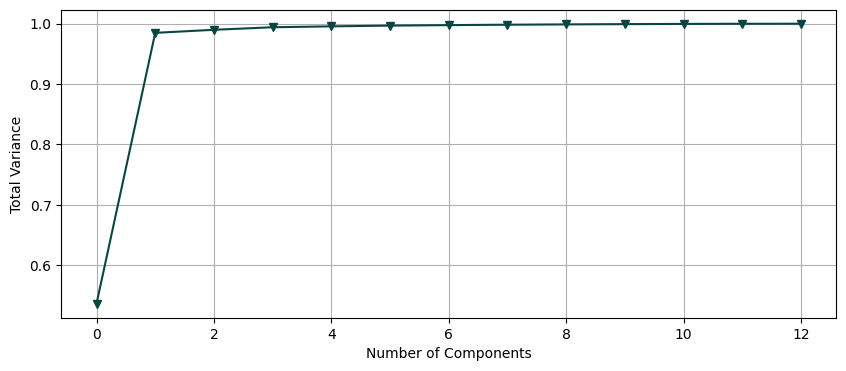

In [167]:
from sklearn.decomposition import PCA
pca = PCA()
pca_transform = pca.fit_transform(A)
plt.figure(figsize=(10,4))
plt.grid(True)  
plt.plot(np.arange(0,13), np.cumsum(pca.explained_variance_ratio_), '-v',color='#0a4544')
plt.xlabel('Number of Components')
plt.ylabel('Total Variance')


**The plot shows variance of each component. Using 1 component explains around 80% of the variance. Using 3 to 12 components explains 100% of the variance. This indicates that using the first 3 components is sufficient to retain majority of the information from the dataset.**

**Finding the label encoded values assigned to the target column "accident_severity"**

In [26]:
sampleClassBias1 = train_dataset_no_nans['accident_severity'].value_counts()
print('The target:')
pretty_print_df(sampleClassBias1)

sampleClassBias = temp_dataset['accident_severity'].value_counts()
print('\n\n\nLabel encoded target:')
pretty_print_df(sampleClassBias)


The target:





Label encoded target:


**It can be identified that the value Slight is encoded as 2, the value Serious is encoded as 1 and the value 0 is encoded as Fatal.**

#**Finding if the target values are balanced or not.**

**Visualizing Imbalance of dataset using Pie Chart**

Categories and number of occurrences for 'accident_severity'


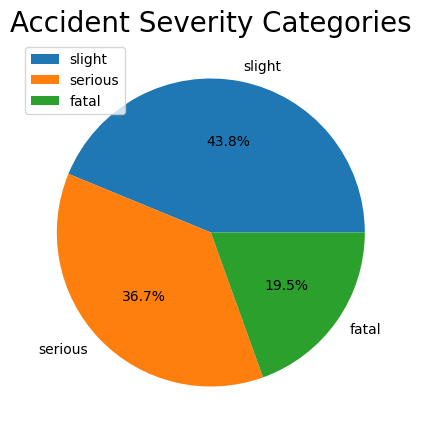

In [27]:
categorical_columns= ['accident_severity']
for col in categorical_columns:
    print(f"Categories and number of occurrences for '{col}'")
    pretty_print_df(train_dataset_no_nans[col].value_counts())
    print()

plt.figure(figsize=(5, 5))
values = train_dataset_no_nans[col].value_counts()
labels = values.index.tolist()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Accident Severity Categories', fontsize=20)
plt.legend(loc=2)
plt.show()


**It can be seen that target value "fatal" consists of only 19.5%, whereas the "serious" and "slight" consists of above 35%. The target values seem to be a bit imbalanced, which is why an oversampling technique needs to be used to balance the target values.**

# **Splitting the dataset into X and Y**

**In the next step I have split the dataset into X and Y, where Y contains the target variable and X contains all other variables. I have also dopped "accident_index" from X, as I believe it does not provide useful information for classification problem.**

In [28]:
X = temp_dataset.drop(["accident_severity","accident_index"], axis=1)#it will drop a whole column. #training
Y = temp_dataset["accident_severity"] #target

**Next, I have performed oversampling on the minority values to balance all the values of the target column "accident_severity" using SMOTE method.**

In [29]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import seaborn as sns
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

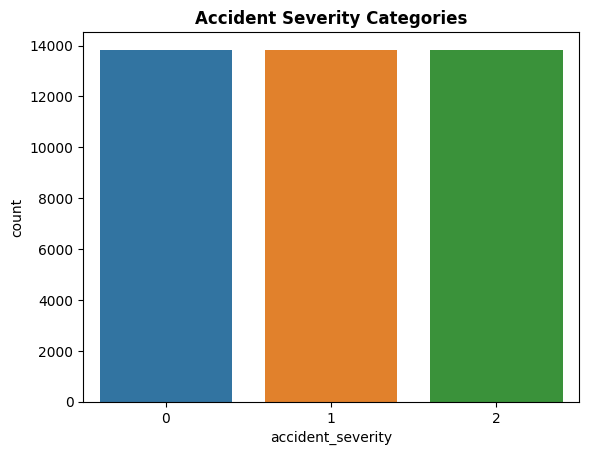

In [30]:
sns.countplot(x = Y)
plt.title("Accident Severity Categories",weight='bold')
plt.show()

**Here, it can be seen that after oversampling, all the values of target is balanced.**

# **Scaling**

**I have used Min-Max Scaling.**

In [31]:
X=(X-X.min())/(X.max()-X.min())
X.head()

speed_limit  light_conditions  weather_conditions  road_surface_conditions  \
0          0.2               0.0                 1.0                      1.0   
1          0.2               0.0                 0.0                      0.0   
2          0.4               1.0                 0.0                      0.0   
3          0.4               1.0                 0.0                      0.0   
4          0.2               1.0                 0.0                      0.0   

   vehicle_type  junction_location  skidding_and_overturning  \
0          0.25                0.0                       1.0   
1          0.75                0.0                       1.0   
2          0.75                0.0                       1.0   
3          0.75                1.0                       1.0   
4          0.75                1.0                       1.0   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                          1.0                         1.0   
1                          0.0                         0.0   
2                          1.0                         1.0   
3                          1.0                         1.0   
4                          1.0                         1.0   

   first_point_of_impact  sex_of_driver  age_of_oldest_driver  
0                    1.0            0.5              0.600000  
1                    0.0            0.5              0.800000  
2                    0.0            0.5              0.431579  
3                    0.0            1.0              0.431579  
4                    0.0            0.0              0.347368

**Heat Map**

**The heat map shows correlation between the different variables. The color scale on the right side shows the colors at each correlation, where it can be seen that the cells with a blue color represents the cells with a positive correlation.**

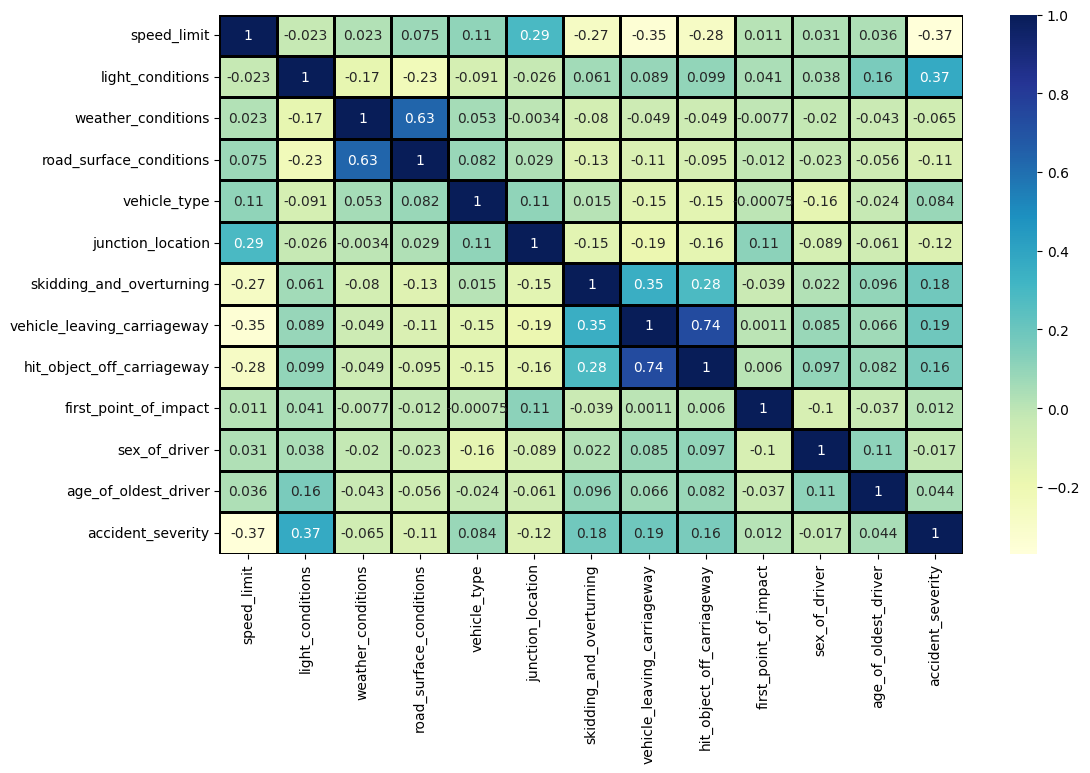

In [174]:
#Correlation after encoding
import seaborn as sns
fig = plt.figure(figsize =(12, 7))
sns.heatmap(temp_dataset.corr(), cmap='YlGnBu', annot=True,linewidths=2, linecolor='black')
plt.show()

# **Splitting the Dataset into training and testing sets**

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [176]:
display(x_train.describe())

speed_limit  light_conditions  weather_conditions  \
count  33228.000000       33228.00000        33228.000000   
mean       0.370766           0.62348            0.166155   
std        0.300309           0.48452            0.369405   
min        0.000000           0.00000            0.000000   
25%        0.200000           0.00000            0.000000   
50%        0.200000           1.00000            0.000000   
75%        0.600000           1.00000            0.000000   
max        1.000000           1.00000            1.000000   

       road_surface_conditions  vehicle_type  junction_location  \
count             33228.000000  33228.000000       33228.000000   
mean                  0.292364      0.489429           0.410618   
std                   0.450252      0.328357           0.491953   
min                   0.000000      0.000000           0.000000   
25%                   0.000000      0.250000           0.000000   
50%                   0.000000      0.750000           0.000000   
75%                   1.000000      0.750000           1.000000   
max                   1.000000      1.000000           1.000000   

       skidding_and_overturning  vehicle_leaving_carriageway  \
count              33228.000000                 33228.000000   
mean                   0.796798                     0.775551   
std                    0.402388                     0.417225   
min                    0.000000                     0.000000   
25%                    1.000000                     1.000000   
50%                    1.000000                     1.000000   
75%                    1.000000                     1.000000   
max                    1.000000                     1.000000   

       hit_object_off_carriageway  first_point_of_impact  sex_of_driver  \
count                33228.000000           33228.000000   33228.000000   
mean                     0.848832               0.201953       0.532021   
std                      0.358218               0.387783       0.284634   
min                      0.000000               0.000000       0.000000   
25%                      1.000000               0.000000       0.500000   
50%                      1.000000               0.000000       0.500000   
75%                      1.000000               0.000000       0.500000   
max                      1.000000               1.000000       1.000000   

       age_of_oldest_driver  
count          33228.000000  
mean               0.432122  
std                0.159077  
min                0.000000  
25%                0.326316  
50%                0.431579  
75%                0.521156  
max                1.000000

In [177]:
display(y_train.describe())

count    33228.000000
mean         0.998736
std          0.816692
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: accident_severity, dtype: float64

**PCA**

In [178]:
from sklearn.decomposition import PCA
comp_num_lst = range(0, 12)
var_exp_lst = []
for comp_num in comp_num_lst:
    # initialize PCA object and specify the number of PCA feature to get
    pca = PCA(n_components=comp_num)
    pca = pca.fit(x_test)
    var_exp_lst.append(np.sum(pca.explained_variance_ratio_))


Explained Variances: {0: 0.0, 1: 0.24, 2: 0.409, 3: 0.53, 4: 0.64, 5: 0.725, 6: 0.797, 7: 0.851, 8: 0.894, 9: 0.931, 10: 0.966, 11: 0.987}



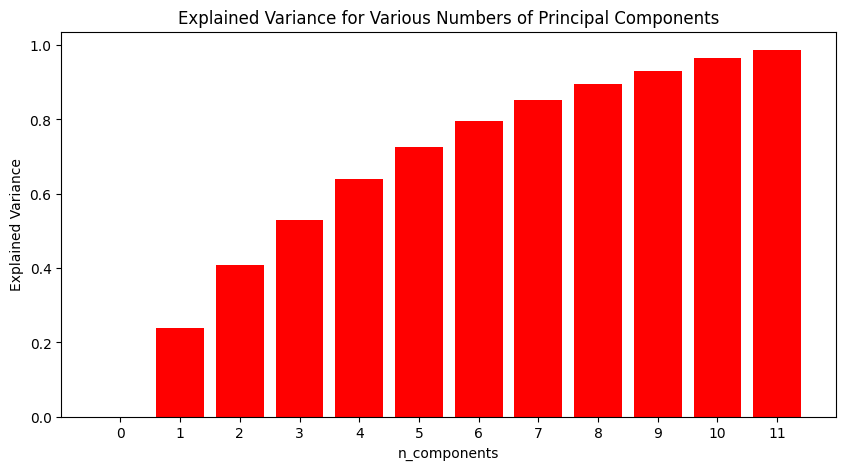

In [179]:

ind = [i for i in range(len(comp_num_lst))]

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
_ = ax1.set_xticks(ind)
_ = ax1.set_xticklabels(comp_num_lst)
_ = ax1.bar(ind, var_exp_lst, width=0.8, color='red')
_ = ax1.set_title('Explained Variance for Various Numbers of Principal Components')
_ = ax1.set_xlabel('n_components')
_ = ax1.set_ylabel('Explained Variance')

print('Explained Variances: {}'.format(dict(zip(comp_num_lst, [np.around(t,3) for t in var_exp_lst]))))
print()

In [180]:

pca = PCA(n_components=.80)
pca_transform = pca.fit_transform(x_test)
print(f'We need {len(pca.explained_variance_ratio_)} components to explain at least 80% of the variance')

We need 7 components to explain at least 80% of the variance


Text(0, 0.5, 'Total variance fraction explained')

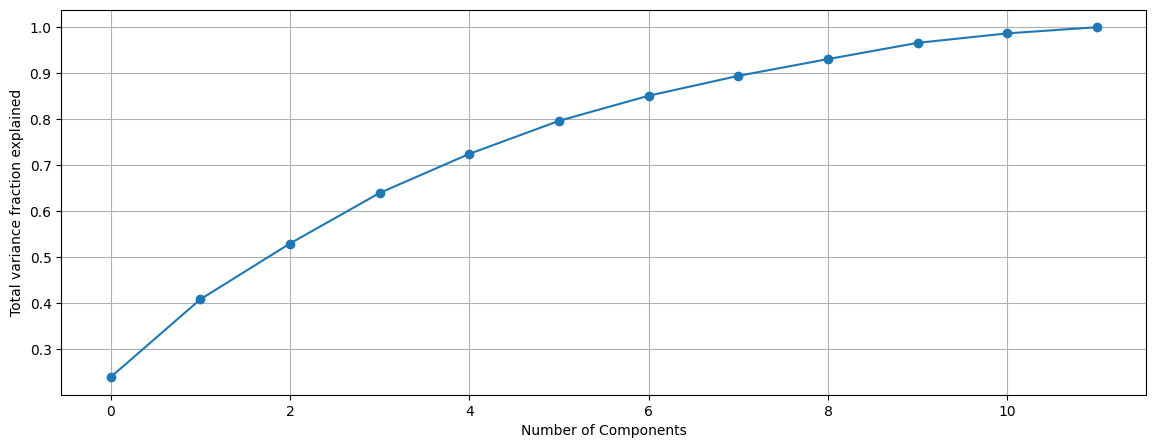

In [181]:
pca = PCA()
pca_transform = pca.fit_transform(x_test)
plt.figure(figsize=(14,5))

plt.grid(True)  
plt.plot(np.arange(0,12), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of Components')
plt.ylabel('Total variance fraction explained')


**3 components explains 65% variance. Scaling may be the reason for the difference between PCA before and after scaling, as without it, some variables may have dominated the analysis due to their high values. After scaling data, each variable contributes to the PCA analysis more evenly.**

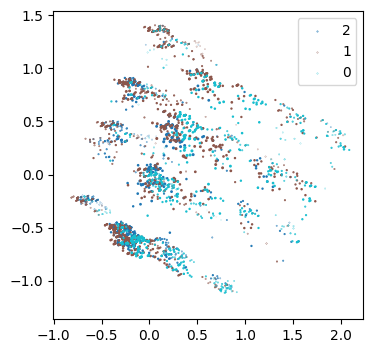

In [182]:

pca_viz = PCA(n_components=6)
pca_viz_transform = pca_viz.fit_transform(x_test)

classes_ = y_test.value_counts().index

from matplotlib import cm 
colors = cm.get_cmap("tab10")(np.linspace(0,1,len(classes_)))

plt.figure(figsize=(4,4))
for target_class,color in zip(classes_, colors):
    plt.scatter(pca_viz_transform[y_test==target_class,0],
                pca_viz_transform[y_test==target_class,1],
                pca_viz_transform[y_test==target_class,2],
                label=target_class,
                color=color)
plt.legend()


# **Classification using Traditional Machine Learning**

# **RANDOM FOREST CLASSIFIER**

In [183]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"], 
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
}

rf = RandomForestClassifier(n_estimators=100)

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(x_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)


feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)


Best estimator: RandomForestClassifier(min_samples_split=10)
Best params: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 10}
Feature importance: [0.17177419 0.16114965 0.04943501 0.02250765 0.3230669  0.01388658
 0.02145631 0.02012457 0.01373785 0.01638762 0.02378047 0.16269321]


In [184]:
results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame(grid.cv_results_["mean_test_score"],columns =["Validation Accuracy"] )], axis = 1)
results

criterion max_features  min_samples_split  Validation Accuracy
0       gini         sqrt                  2             0.776424
1       gini         sqrt                  5             0.788703
2       gini         sqrt                 10             0.795624
3       gini         log2                  2             0.774949
4       gini         log2                  5             0.788462
5       gini         log2                 10             0.795564
6    entropy         sqrt                  2             0.776815
7    entropy         sqrt                  5             0.787920
8    entropy         sqrt                 10             0.795233
9    entropy         log2                  2             0.775672
10   entropy         log2                  5             0.788642
11   entropy         log2                 10             0.795173
12  log_loss         sqrt                  2             0.775431
13  log_loss         sqrt                  5             0.787860
14  log_loss         sqrt                 10             0.795053
15  log_loss         log2                  2             0.776334
16  log_loss         log2                  5             0.788733
17  log_loss         log2                 10             0.794661

**It can be identified that with criterion=log_loss, max_features=log2 and min_samples_split=10, the validation accuracy is 0.795, which is the highest accuracy among all other combinations. Thus, this set of hyperparameters is chosen for prediction.**

In [185]:
print('Best estimator:', grid.best_score_)

Best estimator: 0.7956244248802837


In [186]:


def evaluate_classifier(grid, x_train, y_train, xtest, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(x_train)
    print("Training SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_train, y_train_predict):.3f}')

    # model evaluation for testing set
    y_test_predict = grid.predict(x_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_test, y_test_predict):.3f}')
    return y_train_predict, y_test_predict

y_train_predict, y_test_predict = evaluate_classifier(grid, x_train, y_train, x_test, y_test)


Training SET
--------------------------------------
Accuracy: 0.839

Testing SET
--------------------------------------
Accuracy: 0.799


In [187]:
from sklearn.metrics import confusion_matrix

#confusion matrix for training set
train_cm = confusion_matrix(y_train, y_train_predict)

#confusion matrix for testing set
test_cm = confusion_matrix(y_test, y_test_predict)

print("Training set confusion matrix:")
print(train_cm)

print("\nTesting set confusion matrix:")
print(test_cm)




Training set confusion matrix:
[[10652   302   148]
 [ 1317  8795   954]
 [ 1214  1409  8437]]

Testing set confusion matrix:
[[2549  123   71]
 [ 431 2061  287]
 [ 356  399 2030]]


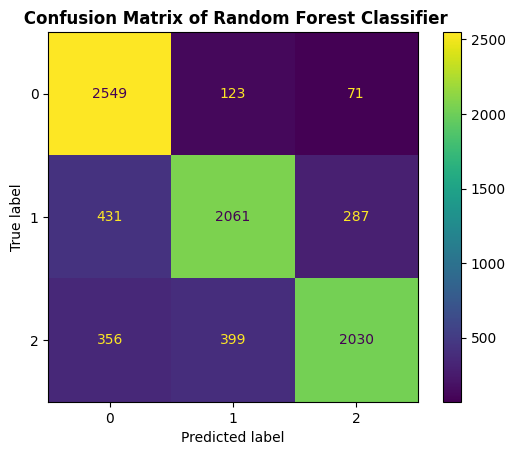

In [188]:
conf_mat = metrics.confusion_matrix(y_test, y_test_predict)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)

cm.plot()
plt.title(" Confusion Matrix of Random Forest Classifier",weight='bold')
plt.show()

In [189]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      2743
           1       0.80      0.74      0.77      2779
           2       0.85      0.73      0.78      2785

    accuracy                           0.80      8307
   macro avg       0.80      0.80      0.80      8307
weighted avg       0.80      0.80      0.80      8307



**The accuracy for Random Forest Regressor is 80% which shows the model is predicting very well. It can also be said from recall, that the model made 93% correct predictions for label 0, 74% correct predictions for label 1 and 73% correct predictions for label 2.**

# **DECISION TREE CLASSIFIER**

In [190]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"], 
    "min_samples_split": [2, 5, 10], 
    "max_features": ["auto","sqrt", "log2"], "splitter":["best", "random"]
}

rf = DecisionTreeClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(x_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)

feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)


Best estimator: DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       min_samples_split=10, splitter='random')
Best params: {'criterion': 'log_loss', 'max_features': 'auto', 'min_samples_split': 10, 'splitter': 'random'}
Best Score: 0.7662817920381599
Feature importance: [0.16155002 0.14765935 0.05797818 0.0176724  0.31814041 0.01875183
 0.022682   0.03930147 0.00935674 0.02195477 0.02907882 0.15587402]


In [191]:
results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame(grid.cv_results_["mean_test_score"],columns =["Validation Accuracy"] )], axis = 1)
results

criterion max_features  min_samples_split splitter  Validation Accuracy
0       gini         auto                  2     best             0.752709
1       gini         auto                  2   random             0.747954
2       gini         auto                  5     best             0.754484
3       gini         auto                  5   random             0.757344
4       gini         auto                 10     best             0.762550
5       gini         auto                 10   random             0.763122
6       gini         sqrt                  2     best             0.752649
7       gini         sqrt                  2   random             0.748917
8       gini         sqrt                  5     best             0.753281
9       gini         sqrt                  5   random             0.755116
10      gini         sqrt                 10     best             0.760714
11      gini         sqrt                 10   random             0.763634
12      gini         log2                  2     best             0.752588
13      gini         log2                  2   random             0.750060
14      gini         log2                  5     best             0.752679
15      gini         log2                  5   random             0.753943
16      gini         log2                 10     best             0.762971
17      gini         log2                 10   random             0.764386
18   entropy         auto                  2     best             0.754033
19   entropy         auto                  2   random             0.749519
20   entropy         auto                  5     best             0.754875
21   entropy         auto                  5   random             0.757133
22   entropy         auto                 10     best             0.758547
23   entropy         auto                 10   random             0.761496
24   entropy         sqrt                  2     best             0.751415
25   entropy         sqrt                  2   random             0.749970
26   entropy         sqrt                  5     best             0.754213
27   entropy         sqrt                  5   random             0.757644
28   entropy         sqrt                 10     best             0.760744
29   entropy         sqrt                 10   random             0.765590
30   entropy         log2                  2     best             0.751746
31   entropy         log2                  2   random             0.748977
32   entropy         log2                  5     best             0.752619
33   entropy         log2                  5   random             0.754635
34   entropy         log2                 10     best             0.759330
35   entropy         log2                 10   random             0.764355
36  log_loss         auto                  2     best             0.752257
37  log_loss         auto                  2   random             0.749940
38  log_loss         auto                  5     best             0.754093
39  log_loss         auto                  5   random             0.756140
40  log_loss         auto                 10     best             0.763212
41  log_loss         auto                 10   random             0.766282
42  log_loss         sqrt                  2     best             0.753040
43  log_loss         sqrt                  2   random             0.748465
44  log_loss         sqrt                  5     best             0.752408
45  log_loss         sqrt                  5   random             0.754635
46  log_loss         sqrt                 10     best             0.760594
47  log_loss         sqrt                 10   random             0.763904
48  log_loss         log2                  2     best             0.752197
49  log_loss         log2                  2   random             0.750511
50  log_loss         log2                  5     best             0.750693
51  log_loss         log2                  5   random             0.754455
52  log_loss         log2   

**with criterion=log_loss, max_features=log2, min_samples_split=10 and splitter=random, the validation accuracy is 0.7635, which is the highest accuracy among all other combinations. Thus, this set of hyperparameters is chosen for prediction.**

In [192]:

def evaluate_classifier(grid, x_train, y_train, xtest, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(x_train)
    print("Training SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_train, y_train_predict):.3f}')

    # model evaluation for testing set
    y_test_predict = grid.predict(x_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_test, y_test_predict):.3f}')
    return y_train_predict, y_test_predict

y_train_predict, y_test_predict = evaluate_classifier(grid, x_train, y_train, x_test, y_test)


Training SET
--------------------------------------
Accuracy: 0.819

Testing SET
--------------------------------------
Accuracy: 0.766


In [193]:
from sklearn.metrics import confusion_matrix

#confusion matrix for training set
train_cm = confusion_matrix(y_train, y_train_predict)

#confusion matrix for testing set
test_cm = confusion_matrix(y_test, y_test_predict)

print("Training set confusion matrix:")
print(train_cm)

print("\nTesting set confusion matrix:")
print(test_cm)




Training set confusion matrix:
[[10462   435   205]
 [ 1530  8596   940]
 [ 1340  1560  8160]]

Testing set confusion matrix:
[[2435  195  113]
 [ 458 2002  319]
 [ 385  471 1929]]


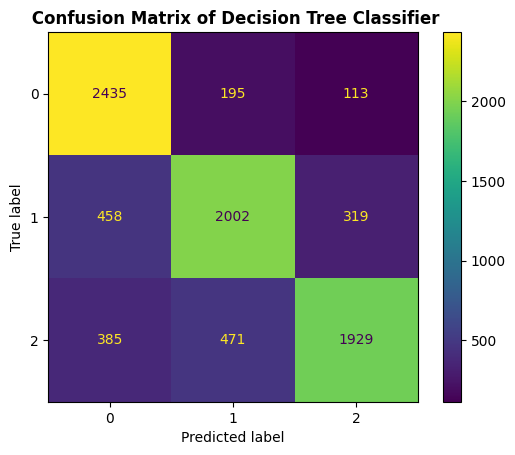

In [194]:
conf_mat = metrics.confusion_matrix(y_test, y_test_predict)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm.plot()
plt.title(" Confusion Matrix of Decision Tree Classifier",weight='bold')
plt.show()

In [195]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2743
           1       0.75      0.72      0.74      2779
           2       0.82      0.69      0.75      2785

    accuracy                           0.77      8307
   macro avg       0.77      0.77      0.76      8307
weighted avg       0.77      0.77      0.76      8307



**The accuracy for Decision Tree Classifier is 77% which indicates the model is predicting well. Moreover, it can be said from recall, that the model made 89% correct predictions for label 0, 72% correct predictions for label 1 and 69% correct predictions for label 2.**

# **LINEAR SVM CLASSIFIER**

In [223]:
from sklearn.svm import LinearSVC
param_grid = {"multi_class":["ovr", "crammer_singer"],
              "penalty": ["l1", "l2"], 
              "loss": ["hinge", "squared_hinge"], 
              "multi_class": ["ovr", "crammer_singer"],           
              }

rf = LinearSVC()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(x_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)

coef = grid.best_estimator_.coef_
print('Coefficients:', coef)


intercept=grid.best_estimator_.intercept_
print('Intercept:', intercept)

Best estimator: LinearSVC()
Best params: {'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}
Best Score: 0.7360662001633117
Coefficients: [[ 1.21404982 -0.76095767 -0.49863393 -0.07772075  0.5553936  -0.03383961
  -0.1292045  -0.07606934 -0.02744354  0.00910026 -0.07787398  0.18854766]
 [-0.24278482 -0.06381307  0.54490918  0.04862993 -1.38443238 -0.02313291
  -0.04125839 -0.01291209  0.01240905 -0.05425239  0.00399426 -0.06416468]
 [-1.13443518  0.92467542 -0.2220012   0.02093283  1.09012097  0.05314238
   0.20840647  0.08964161  0.04455531  0.05500629  0.08432085 -0.08748232]]
Intercept: [-0.34831363  0.44571744 -1.37625855]


In [224]:
results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame(grid.cv_results_["mean_test_score"],columns =["Validation Accuracy"] )], axis = 1)
results

loss     multi_class penalty  Validation Accuracy
0          hinge             ovr      l1                  NaN
1          hinge             ovr      l2             0.693361
2          hinge  crammer_singer      l1             0.699079
3          hinge  crammer_singer      l2             0.698598
4  squared_hinge             ovr      l1                  NaN
5  squared_hinge             ovr      l2             0.736066
6  squared_hinge  crammer_singer      l1             0.699230
7  squared_hinge  crammer_singer      l2             0.698718

**With loss= squared_hinge, multi_class=crammer_singer, penalty=l2, the validation accuracy is 0.699, which is the highest accuracy among all other combinations. Thus, this set of hyperparameters is chosen for prediction.**

In [225]:

def evaluate_classifier(grid, x_train, y_train, xtest, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(x_train)
    print("Training SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_train, y_train_predict):.3f}')

    # model evaluation for testing set
    y_test_predict = grid.predict(x_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_test, y_test_predict):.3f}')
    return y_train_predict, y_test_predict

y_train_predict, y_test_predict = evaluate_classifier(grid, x_train, y_train, x_test, y_test)


Training SET
--------------------------------------
Accuracy: 0.737

Testing SET
--------------------------------------
Accuracy: 0.747


In [226]:
from sklearn.metrics import confusion_matrix

# confusion matrix for training set
train_cm = confusion_matrix(y_train, y_train_predict)

# onfusion matrix for testing set
test_cm = confusion_matrix(y_test, y_test_predict)

print("Training set confusion matrix:")
print(train_cm)

print("\nTesting set confusion matrix:")
print(test_cm)




Training set confusion matrix:
[[8772 1423  907]
 [1873 7958 1235]
 [1339 1975 7746]]

Testing set confusion matrix:
[[2205  313  225]
 [ 438 2042  299]
 [ 328  502 1955]]


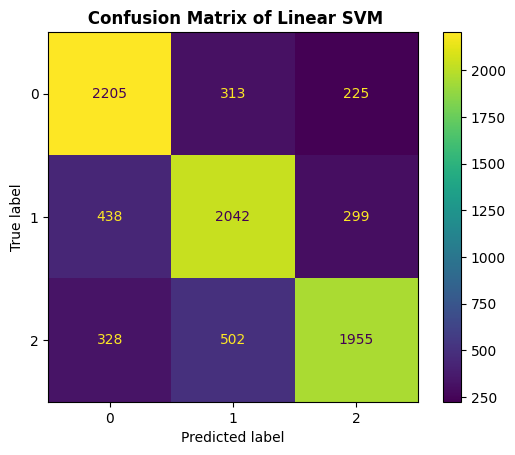

In [227]:
conf_mat = metrics.confusion_matrix(y_test, y_test_predict)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm.plot()
plt.title(" Confusion Matrix of Linear SVM",weight='bold')
plt.show()

In [228]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2743
           1       0.71      0.73      0.72      2779
           2       0.79      0.70      0.74      2785

    accuracy                           0.75      8307
   macro avg       0.75      0.75      0.75      8307
weighted avg       0.75      0.75      0.75      8307



**The accuracy for Linear SVM is 75%. Moreover, it can be said from recall, that the model made 80% correct predictions for label 0, 73% correct predictions for label 1 and 70% correct predictions for label 2.**

# **GRADIENT BOOSTING CLASSIFIER**

In [202]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
   "loss":["log_loss", "deviance", "exponential"],"learning_rate": [0.01, 0.1, 1], "min_samples_leaf": [1, 2, 4]
}

rf = GradientBoostingClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(x_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)

feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)


Best estimator: GradientBoostingClassifier(learning_rate=1, min_samples_leaf=4)
Best params: {'learning_rate': 1, 'loss': 'log_loss', 'min_samples_leaf': 4}
Best Score: 0.7910799758601453
Feature importance: [0.2257548  0.2001495  0.05919051 0.0047185  0.45899686 0.00235032
 0.00538784 0.00463337 0.00187753 0.00158779 0.00393934 0.03141365]


In [203]:
results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame(grid.cv_results_["mean_test_score"],columns =["Validation Accuracy"] )], axis = 1)
results

learning_rate         loss  min_samples_leaf  Validation Accuracy
0            0.01     log_loss                 1             0.767365
1            0.01     log_loss                 2             0.767124
2            0.01     log_loss                 4             0.767124
3            0.01     deviance                 1             0.767365
4            0.01     deviance                 2             0.767124
5            0.01     deviance                 4             0.767124
6            0.01  exponential                 1                  NaN
7            0.01  exponential                 2                  NaN
8            0.01  exponential                 4                  NaN
9            0.10     log_loss                 1             0.790839
10           0.10     log_loss                 2             0.790809
11           0.10     log_loss                 4             0.790779
12           0.10     deviance                 1             0.790839
13           0.10     deviance                 2             0.790809
14           0.10     deviance                 4             0.790779
15           0.10  exponential                 1                  NaN
16           0.10  exponential                 2                  NaN
17           0.10  exponential                 4                  NaN
18           1.00     log_loss                 1             0.790267
19           1.00     log_loss                 2             0.790328
20           1.00     log_loss                 4             0.791080
21           1.00     deviance                 1             0.790177
22           1.00     deviance                 2             0.790297
23           1.00     deviance                 4             0.791080
24           1.00  exponential                 1                  NaN
25           1.00  exponential                 2                  NaN
26           1.00  exponential                 4                  NaN

**With loss= deviance, min_samples_leaf =4 and learning_rate=1, the validation accuracy is 0.791, which is the highest accuracy among all other combinations. Thus, this set of hyperparameters is chosen for prediction.**

In [204]:


def evaluate_classifier(grid, x_train, y_train, xtest, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(x_train)
    print("Training SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_train, y_train_predict):.3f}')

    # model evaluation for testing set
    y_test_predict = grid.predict(x_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_test, y_test_predict):.3f}')
    return y_train_predict, y_test_predict

y_train_predict, y_test_predict = evaluate_classifier(grid, x_train, y_train, x_test, y_test)


Training SET
--------------------------------------
Accuracy: 0.806

Testing SET
--------------------------------------
Accuracy: 0.794


In [205]:
from sklearn.metrics import confusion_matrix

#confusion matrix for training set
train_cm = confusion_matrix(y_train, y_train_predict)

#confusion matrix for testing set
test_cm = confusion_matrix(y_test, y_test_predict)

print("Training set confusion matrix:")
print(train_cm)

print("\nTesting set confusion matrix:")
print(test_cm)




Training set confusion matrix:
[[10477   454   171]
 [ 1770  8189  1107]
 [ 1481  1478  8101]]

Testing set confusion matrix:
[[2536  146   61]
 [ 463 2035  281]
 [ 379  382 2024]]


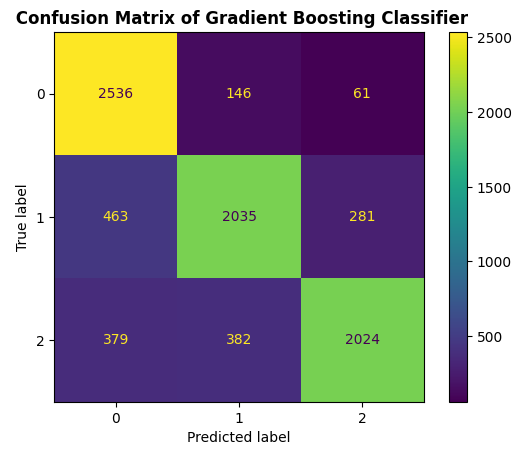

In [206]:
conf_mat = metrics.confusion_matrix(y_test, y_test_predict)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm.plot()
plt.title(" Confusion Matrix of Gradient Boosting Classifier",weight='bold')
plt.show()

In [207]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      2743
           1       0.79      0.73      0.76      2779
           2       0.86      0.73      0.79      2785

    accuracy                           0.79      8307
   macro avg       0.80      0.79      0.79      8307
weighted avg       0.80      0.79      0.79      8307



**The accuracy for Gradient Boosting Classifier is 79% which shows the model is predicting very well. In addition, it can be said from recall, that the model made 92% correct predictions for label 0, 73% correct predictions for label 1 and 73% correct predictions for label 2.**

# **Dummy Classifier**

In [208]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy= "most_frequent")

baseline.fit(x_train, y_train)

pred = baseline.predict(x_test)

accuracy_score(y_test, pred)

0.3302034428794992

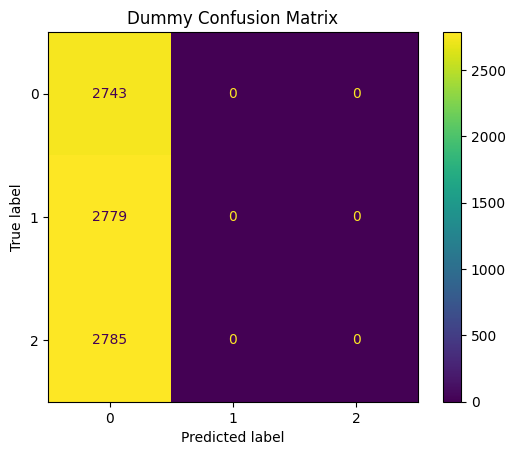

In [209]:
conf_mat = metrics.confusion_matrix(y_test, pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm.plot()
plt.title("Dummy Confusion Matrix")
plt.show()

In [210]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50      2743
           1       0.00      0.00      0.00      2779
           2       0.00      0.00      0.00      2785

    accuracy                           0.33      8307
   macro avg       0.11      0.33      0.17      8307
weighted avg       0.11      0.33      0.16      8307



**The accuracy for Dummy Classifier is 33%.**

# **Classification using Neural Network**

In [34]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


def one_layer_model(num_of_input_features, hidden_layer_nodes=20):
   
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation='relu'))
    model.add(layers.Dense(7, activation='softmax')) 
    return model



In [47]:
clf = KerasClassifier(
    model=one_layer_model,
    loss="sparse_categorical_crossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= x_train.shape[1],
    epochs= 50,
    batch_size= 64,
    verbose= 0,
    validation_split= 0.2,
    optimizer = "adam",
    optimizer__learning_rate = 0.001,
)

In [48]:
params = {
    'optimizer__learning_rate': [0.01, 0.001],
    'model__hidden_layer_nodes': [20,30,40],
}

gs = GridSearchCV(clf, params, scoring='balanced_accuracy', verbose=True)

gs.fit(x_train, y_train)

print(gs.best_score_, gs.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.7871475874641903 {'model__hidden_layer_nodes': 30, 'optimizer__learning_rate': 0.01}


In [49]:
results = pd.concat([pd.DataFrame(gs.cv_results_["params"]), pd.DataFrame(gs.cv_results_["mean_test_score"],columns =["Validation Accuracy"] )], axis = 1)
results

model__hidden_layer_nodes  optimizer__learning_rate  Validation Accuracy
0                         20                     0.010             0.784901
1                         20                     0.001             0.768788
2                         30                     0.010             0.787148
3                         30                     0.001             0.774197
4                         40                     0.010             0.786340
5                         40                     0.001             0.778100

**With model_hidden_layer_nodes=40 and optimizer__learning_rate=0.001, the model gives the best accuracy of 78%. This hyperparameter combination is then used to predict.**

In [50]:
print(gs.best_score_)

0.7871475874641903


In [51]:
print(gs.best_params_)

{'model__hidden_layer_nodes': 30, 'optimizer__learning_rate': 0.01}


In [52]:

test_probabilities = gs.best_estimator_.predict(x_test)

print(classification_report(y_test, test_probabilities))              

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      2743
           1       0.80      0.73      0.76      2779
           2       0.86      0.72      0.78      2785

    accuracy                           0.79      8307
   macro avg       0.80      0.79      0.79      8307
weighted avg       0.80      0.79      0.79      8307



**The accuracy for neural network is 79% which shows the neural network model is predicting very well. In addition, it can be said from recall, that the model made 92% correct predictions for label 0, 72% correct predictions for label 1 and 74% correct predictions for label 2.**

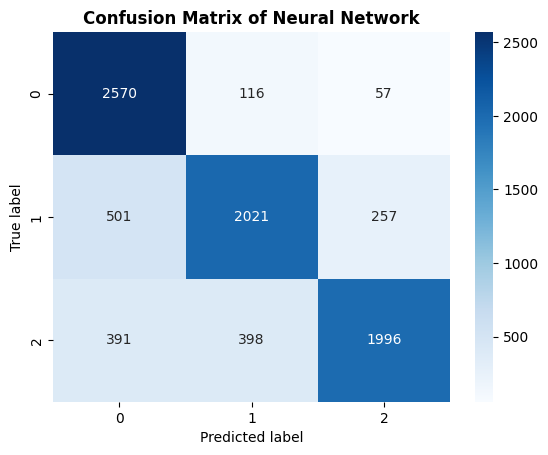

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_probabilities)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of Neural Network',weight='bold')
plt.show()

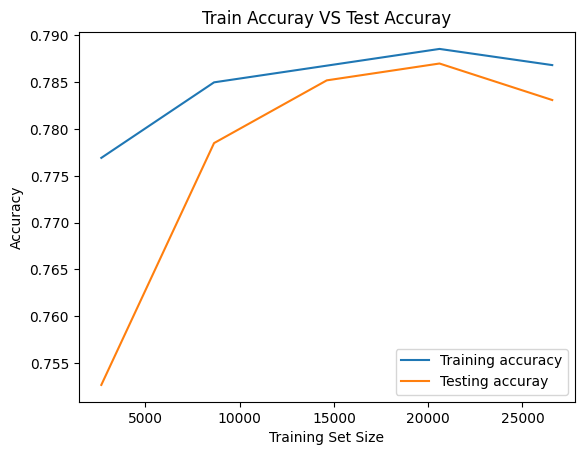

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gs.best_estimator_, x_train, y_train, cv=5, scoring='balanced_accuracy', n_jobs=-1)

plt.figure()

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing accuray')

plt.title('Train Accuray VS Test Accuray')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
